In [73]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime
import numpy as np
import shap

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier

In [74]:
df = pd.read_csv('./Data/SHIB-USDT_Data/SHIB-USDT_Data_1m/SHIB_USDT_1m_All.csv')
df

,Open_time,Open,High,Low,Close,Volume,quote_av,trades,tb_base_av,tb_quote_av,Symbol
0,2021-05-10 20:00:00,0.000014,0.000050,0.000014,0.000033,1.051269e+12,3.912794e+07,58171,7.120811e+11,2.728068e+07,SHIBUSDT
1,2021-05-10 20:01:00,0.000033,0.000034,0.000030,0.000032,4.840406e+11,1.577234e+07,26739,2.771165e+11,9.101184e+06,SHIBUSDT
2,2021-05-10 20:02:00,0.000032,0.000032,0.000030,0.000030,3.329267e+11,1.031886e+07,17331,1.793448e+11,5.579455e+06,SHIBUSDT
3,2021-05-10 20:03:00,0.000030,0.000031,0.000030,0.000030,3.199571e+11,9.617228e+06,17901,1.434040e+11,4.316279e+06,SHIBUSDT
4,2021-05-10 20:04:00,0.000030,0.000030,0.000027,0.000027,2.492414e+11,7.183487e+06,13129,1.001472e+11,2.923990e+06,SHIBUSDT
...,...,...,...,...,...,...,...,...,...,...,...
863845,2022-12-31 23:55:00,0.000008,0.000008,0.000008,0.000008,4.459312e+09,3.625455e+04,57,2.704507e+09,2.198798e+04,SHIBUSDT
863846,2022-12-31 23:56:00,0.000008,0.000008,0.000008,0.000008,3.607047e+09,2.935989e+04,62,3.449950e+09,2.808269e+04,SHIBUSDT
863847,2022-12-31 23:57:00,0.000008,0.000008,0.000008,0.000008,4.174192e+08,3.400356e+03,9,2.563536e+08,2.089282e+03,SHIBUSDT
863848,2022-12-31 23:58:00,0.000008,0.000008,0.000008,0.000008,7.256370e+07,5.909385e+02,13,2.700295e+07,2.200741e+02,SHIBUSDT


In [75]:
df = df.tail(102890)
df

,Open_time,Open,High,Low,Close,Volume,quote_av,trades,tb_base_av,tb_quote_av,Symbol
760960,2022-10-21 13:10:00,0.000010,0.000010,0.000010,0.000010,3.178852e+09,31534.087945,48,3.161604e+09,31363.115013,SHIBUSDT
760961,2022-10-21 13:11:00,0.000010,0.000010,0.000010,0.000010,9.862925e+07,979.318740,6,9.165896e+07,910.173473,SHIBUSDT
760962,2022-10-21 13:12:00,0.000010,0.000010,0.000010,0.000010,9.296639e+07,923.137274,5,9.107051e+07,904.330204,SHIBUSDT
760963,2022-10-21 13:13:00,0.000010,0.000010,0.000010,0.000010,8.597472e+07,852.891882,6,2.265000e+06,22.491450,SHIBUSDT
760964,2022-10-21 13:14:00,0.000010,0.000010,0.000010,0.000010,4.022718e+07,399.053636,4,0.000000e+00,0.000000,SHIBUSDT
...,...,...,...,...,...,...,...,...,...,...,...
863845,2022-12-31 23:55:00,0.000008,0.000008,0.000008,0.000008,4.459312e+09,36254.546640,57,2.704507e+09,21987.981828,SHIBUSDT
863846,2022-12-31 23:56:00,0.000008,0.000008,0.000008,0.000008,3.607047e+09,29359.885479,62,3.449950e+09,28082.688658,SHIBUSDT
863847,2022-12-31 23:57:00,0.000008,0.000008,0.000008,0.000008,4.174192e+08,3400.356125,9,2.563536e+08,2089.281767,SHIBUSDT
863848,2022-12-31 23:58:00,0.000008,0.000008,0.000008,0.000008,7.256370e+07,590.938531,13,2.700295e+07,220.074067,SHIBUSDT


In [76]:
WINDOW_SIZE=5
BATCH_SIZE=32
Predicting_time=10
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)

In [77]:
# Feature selection을 위한 temp_btc
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av']
temp_btc = df[features].copy()

temp_btc['Return'] = temp_btc['Close'].pct_change() # Return 계산
temp_btc['Maximum Hour Return'] = temp_btc['Return'].rolling(window=60).max() # Calculate maximum return
temp_btc['Price Volatility'] = temp_btc['Close'].rolling(window=60).std() # Minutewise price volatility
# temp_btc['Return Volatility'] = temp_btc['Return'].rolling(window=60).std()  # Minutewise return volatility
for n in [60, 180]:  # 1, 3, 6, 12, 24 hours *Calculate momentums
    temp_btc[f'Momentum {n//60}H'] = temp_btc['Close'].pct_change(n)
temp_btc['Maximum Daily Return'] = temp_btc['Return'].rolling(window=2880).max()
temp_btc['Avg Price'] = temp_btc['Close'].rolling(window=60).mean() # Calculate average return for 1 hour

temp_btc.dropna(inplace=True)
temp_btc = temp_btc.tail(100)
temp_btc

,Open,High,Low,Close,Volume,quote_av,trades,tb_base_av,tb_quote_av,Return,Maximum Hour Return,Price Volatility,Momentum 1H,Momentum 3H,Maximum Daily Return,Avg Price
863750,0.000008,0.000008,0.000008,0.000008,3.147917e+08,2555.160430,12,2.200116e+08,1786.494436,-0.001232,0.001236,9.707589e-09,-0.001232,-0.001232,0.007317,0.000008
863751,0.000008,0.000008,0.000008,0.000008,4.915476e+08,3991.258173,13,4.807364e+08,3903.579755,0.001233,0.001236,9.827610e-09,0.001233,0.001233,0.007317,0.000008
863752,0.000008,0.000008,0.000008,0.000008,1.753972e+09,14245.131536,46,1.729234e+09,14044.292870,0.000000,0.001236,9.827610e-09,0.000000,0.001233,0.007317,0.000008
863753,0.000008,0.000008,0.000008,0.000008,2.516599e+08,2044.253603,9,7.749232e+07,630.012529,0.001232,0.001236,1.022211e-08,0.002466,0.001232,0.007317,0.000008
863754,0.000008,0.000008,0.000008,0.000008,1.315492e+09,10681.842529,12,4.834926e+06,39.307948,0.000000,0.001236,1.049078e-08,0.001232,0.001232,0.007317,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863845,0.000008,0.000008,0.000008,0.000008,4.459312e+09,36254.546640,57,2.704507e+09,21987.981828,-0.001229,0.002463,1.406603e-08,-0.002454,0.001232,0.007317,0.000008
863846,0.000008,0.000008,0.000008,0.000008,3.607047e+09,29359.885479,62,3.449950e+09,28082.688658,0.002460,0.002463,1.406603e-08,0.000000,0.004932,0.007317,0.000008
863847,0.000008,0.000008,0.000008,0.000008,4.174192e+08,3400.356125,9,2.563536e+08,2089.281767,-0.001227,0.002463,1.417705e-08,-0.001227,0.002463,0.007317,0.000008
863848,0.000008,0.000008,0.000008,0.000008,7.256370e+07,590.938531,13,2.700295e+07,220.074067,0.001229,0.002463,1.417705e-08,0.000000,0.004932,0.007317,0.000008


In [78]:
# Scale
scaler = MinMaxScaler()

scaled = scaler.fit_transform(temp_btc)
scaled

array([[0.125     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.24988453, 0.        ,
        0.00353357],
       [0.125     , 0.14285714, 0.        , ..., 0.24988453, 0.        ,
        0.00353357],
       ...,
       [0.375     , 0.42857143, 0.5       , ..., 0.37459584, 0.        ,
        0.97879859],
       [0.5       , 0.42857143, 0.5       , ..., 0.62494226, 0.        ,
        0.97879859],
       [0.375     , 0.42857143, 0.5       , ..., 0.49946112, 0.        ,
        0.97879859]])

In [79]:
# Model for feature_select
feature_model = Sequential([
    Conv1D(filters=32, kernel_size=8, padding="causal", activation="relu"),
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1)
])

feature_model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [80]:
def feature_select(x_lag, y_lag):
    X_feature_train, X_feature_test, y_feature_train, y_feature_test = train_test_split(scaled[ : scaled.shape[0]-(x_lag + y_lag)-1], scaled[1+y_lag : scaled.shape[0]-x_lag, 3], test_size=0.1, random_state=0, shuffle=False)
    X_feature_reshaped = X_feature_train.reshape(X_feature_train.shape[0], X_feature_train.shape[1], 1)
    feature_model.fit(X_feature_reshaped, y_feature_train, epochs=40)

    X_feature_reshaped2 = X_feature_reshaped.reshape(X_feature_reshaped.shape[0], X_feature_reshaped.shape[1])
    masker = shap.maskers.Independent(data=X_feature_reshaped2, max_samples=1)
    explainer = shap.Explainer(feature_model, masker=masker)
    shap_values = explainer(X_feature_reshaped2)

    return shap_values.values

btc_columns = temp_btc.columns.values
feature_importance_by_y_lag = []

In [81]:
from matplotlib import cm

Epoch 1/40


3/3 [==============================] - 3s 8ms/step - loss: 0.1814 - mse: 0.3629
Epoch 2/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1657 - mse: 0.3314
Epoch 3/40
3/3 [==============================] - 0s 8ms/step - loss: 0.1511 - mse: 0.3022
Epoch 4/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1412 - mse: 0.2823
Epoch 5/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1321 - mse: 0.2642
Epoch 6/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1228 - mse: 0.2456
Epoch 7/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1128 - mse: 0.2257
Epoch 8/40
3/3 [==============================] - 0s 8ms/step - loss: 0.1021 - mse: 0.2042
Epoch 9/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0901 - mse: 0.1802
Epoch 10/40
3/3 [==============================] - 0s 6ms/step - loss: 0.0766 - mse: 0.1532
Epoch 11/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0631 - mse: 0.1262
Epoch 12

Permutation explainer: 90it [00:32,  1.94it/s]                        

Epoch 1/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0101 - mse: 0.0202
Epoch 2/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0098 - mse: 0.0197
Epoch 3/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0096 - mse: 0.0192
Epoch 4/40
3/3 [==============================] - 0s 6ms/step - loss: 0.0093 - mse: 0.0186
Epoch 5/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0091 - mse: 0.0181


Epoch 6/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0088 - mse: 0.0176
Epoch 7/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0086 - mse: 0.0172
Epoch 8/40
3/3 [==============================] - 0s 6ms/step - loss: 0.0082 - mse: 0.0165
Epoch 9/40
3/3 [==============================] - 0s 11ms/step - loss: 0.0080 - mse: 0.0159
Epoch 10/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0078 - mse: 0.0155
Epoch 11/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0075 - mse: 0.0149
Epoch 12/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0143
Epoch 13/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0069 - mse: 0.0138
Epoch 14/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0066 - mse: 0.0132
Epoch 15/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0064 - mse: 0.0127
Epoch 16/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0061 - mse

Permutation explainer: 89it [00:31,  1.95it/s]                        

Epoch 1/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0073
Epoch 2/40
3/3 [==============================] - 0s 9ms/step - loss: 0.0037 - mse: 0.0073
Epoch 3/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0072
Epoch 4/40
3/3 [==============================] - 0s 13ms/step - loss: 0.0036 - mse: 0.0072
Epoch 5/40


3/3 [==============================] - 0s 10ms/step - loss: 0.0036 - mse: 0.0072
Epoch 6/40
3/3 [==============================] - 0s 10ms/step - loss: 0.0036 - mse: 0.0072
Epoch 7/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0071
Epoch 8/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0071
Epoch 9/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0071
Epoch 10/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0072
Epoch 11/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0071
Epoch 12/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0070
Epoch 13/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0072
Epoch 14/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0070
Epoch 15/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0070
Ep

Permutation explainer: 88it [00:31,  1.92it/s]                        

Epoch 1/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0067
Epoch 2/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0068
Epoch 3/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0068
Epoch 4/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0068
Epoch 5/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0066
Epoch 6/40
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mse: 0.0076

3/3 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0066
Epoch 7/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0066
Epoch 8/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0066
Epoch 9/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0066
Epoch 10/40
3/3 [==============================] - 0s 10ms/step - loss: 0.0033 - mse: 0.0066
Epoch 11/40
3/3 [==============================] - 0s 10ms/step - loss: 0.0033 - mse: 0.0066
Epoch 12/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0066
Epoch 13/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0065
Epoch 14/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0065
Epoch 15/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0034 - mse: 0.0067
Epoch 16/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0032 - mse: 0.0064
E

Permutation explainer: 87it [00:31,  1.88it/s]                        

Epoch 1/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0031 - mse: 0.0062
Epoch 2/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0060
Epoch 3/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0060
Epoch 4/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0031 - mse: 0.0061
Epoch 5/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0060


Epoch 6/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0060
Epoch 7/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0060
Epoch 8/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0060
Epoch 9/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0060
Epoch 10/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0060
Epoch 11/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0060
Epoch 12/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0060
Epoch 13/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0060
Epoch 14/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0061
Epoch 15/40
3/3 [==============================] - 0s 16ms/step - loss: 0.0030 - mse: 0.0060
Epoch 16/40
3/3 [==============================] - 0s 16ms/step - loss: 0.0030 - ms

Permutation explainer: 86it [00:31,  1.93it/s]                        
invalid value encountered in true_divide


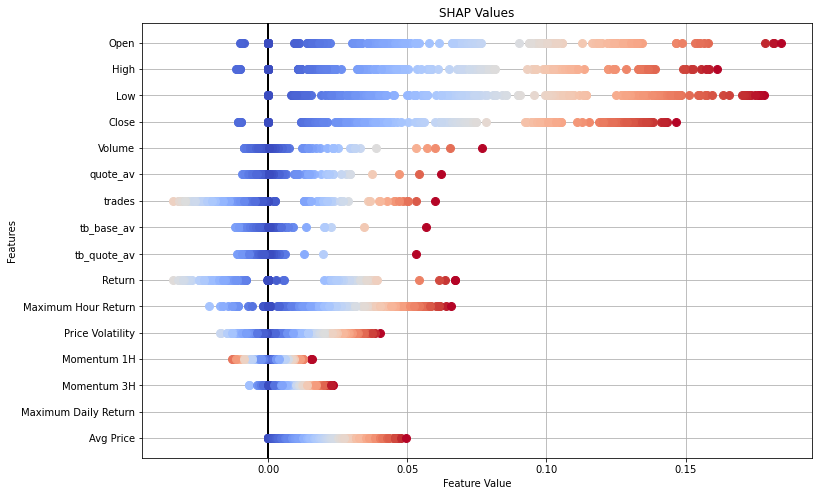

===Time lag 1 ===
Open: 1.4027050646230734
High: 1.2829685415750016
Low: 1.7640373178215967
Close: 1.59123445327197
Volume: 0.19845476547700247
quote_av: 0.17083487209224277
trades: 0.5780571247334338
tb_base_av: 0.18076878125673707
tb_quote_av: 0.15220833320682148
Return: 0.3362553327725907
Maximum Hour Return: 0.7484842804333935
Price Volatility: 0.45264207789188476
Momentum 1H: 0.15397326636673772
Momentum 3H: 0.20552065401678182
Maximum Daily Return: 0.0
Avg Price: 0.517524974857936


In [82]:
y_lag = 0
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

In [83]:
y_lag = 1
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

Epoch 1/40


3/3 [==============================] - 0s 7ms/step - loss: 0.0050 - mse: 0.0100
Epoch 2/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0050 - mse: 0.0101
Epoch 3/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0050 - mse: 0.0099
Epoch 4/40
3/3 [==============================] - 0s 9ms/step - loss: 0.0050 - mse: 0.0100
Epoch 5/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0049 - mse: 0.0098
Epoch 6/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0049 - mse: 0.0098
Epoch 7/40
3/3 [==============================] - 0s 6ms/step - loss: 0.0049 - mse: 0.0097
Epoch 8/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0049 - mse: 0.0097
Epoch 9/40
3/3 [==============================] - 0s 6ms/step - loss: 0.0049 - mse: 0.0098
Epoch 10/40
3/3 [==============================] - 0s 7ms/step - loss: 0.0048 - mse: 0.0096
Epoch 11/40
3/3 [==============================] - 0s 6ms/step - loss: 0.0048 - mse: 0.0097
Epoch 12

Epoch 1/40
29/29 [==============================] - 0s 5ms/step - loss: 5.7917e-04 - mse: 0.0012
Epoch 2/40
29/29 [==============================] - 0s 6ms/step - loss: 5.8053e-04 - mse: 0.0012
Epoch 3/40
29/29 [==============================] - 0s 5ms/step - loss: 6.2724e-04 - mse: 0.0013
Epoch 4/40
29/29 [==============================] - 0s 5ms/step - loss: 5.9134e-04 - mse: 0.0012
Epoch 5/40
29/29 [==============================] - 0s 5ms/step - loss: 5.9708e-04 - mse: 0.0012
Epoch 6/40
29/29 [==============================] - 0s 5ms/step - loss: 5.9608e-04 - mse: 0.0012
Epoch 7/40
29/29 [==============================] - 0s 5ms/step - loss: 5.9000e-04 - mse: 0.0012
Epoch 8/40
29/29 [==============================] - 0s 5ms/step - loss: 6.0234e-04 - mse: 0.0012
Epoch 9/40
29/29 [==============================] - 0s 6ms/step - loss: 6.6481e-04 - mse: 0.0013
Epoch 10/40
29/29 [==============================] - 0s 6ms/step - loss: 5.9321e-04 - mse: 0.0012
Epoch 11/40
29/29 [==========

Permutation explainer: 898it [04:23,  3.29it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8911e-04 - mse: 0.0012


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 5.7196e-04 - mse: 0.0011
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.7270e-04 - mse: 0.0011
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 5.6516e-04 - mse: 0.0011
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6760e-04 - mse: 0.0011
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 6.0760e-04 - mse: 0.0012
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5829e-04 - mse: 0.0011
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6587e-04 - mse: 0.0011
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6256e-04 - mse: 0.0011
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8297e-04 - mse: 0.0012
Epoch 11/40
28/28 [==============================] - 0s 5ms/step - loss: 5.6433e-04 - mse: 0.0011
Epoch 12/40
28/28 [=========

Permutation explainer: 897it [03:58,  3.60it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6356e-04 - mse: 0.0011


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5029e-04 - mse: 0.0011
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4835e-04 - mse: 0.0011
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5352e-04 - mse: 0.0011
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5542e-04 - mse: 0.0011
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6132e-04 - mse: 0.0011
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4944e-04 - mse: 0.0011
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 5.8473e-04 - mse: 0.0012
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 5.5488e-04 - mse: 0.0011
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4980e-04 - mse: 0.0011
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6739e-04 - mse: 0.0011
Epoch 12/40
28/28 [=========

Permutation explainer: 896it [03:59,  3.58it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 5.4281e-04 - mse: 0.0011


Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 5.6208e-04 - mse: 0.0011
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 5.4284e-04 - mse: 0.0011
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4894e-04 - mse: 0.0011
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 5.6278e-04 - mse: 0.0011
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 5.2699e-04 - mse: 0.0011
Epoch 7/40
28/28 [==============================] - 0s 6ms/step - loss: 5.5619e-04 - mse: 0.0011
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 5.3557e-04 - mse: 0.0011
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 5.4881e-04 - mse: 0.0011
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 5.2916e-04 - mse: 0.0011
Epoch 11/40
28/28 [==============================] - 0s 5ms/step - loss: 5.3327e-04 - mse: 0.0011
Epoch 12/40
28/28 [=========

Permutation explainer: 895it [04:02,  3.54it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3024e-04 - mse: 0.0011


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2188e-04 - mse: 0.0010
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1735e-04 - mse: 0.0010
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2326e-04 - mse: 0.0010
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1220e-04 - mse: 0.0010
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2421e-04 - mse: 0.0010
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1588e-04 - mse: 0.0010
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2943e-04 - mse: 0.0011
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3844e-04 - mse: 0.0011
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2881e-04 - mse: 0.0011
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2197e-04 - mse: 0.0010
Epoch 12/40
28/28 [=========

Permutation explainer: 894it [04:00,  3.57it/s]                         
invalid value encountered in true_divide


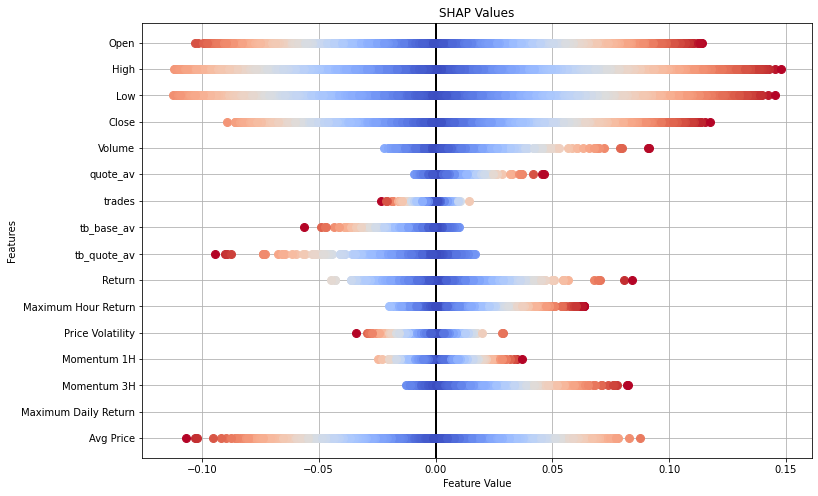

===Time lag 3 ===
Open: 1.4637723616567921
High: 1.7559627878919926
Low: 1.7205197148258424
Close: 1.2746492836142465
Volume: 0.17891058068722598
quote_av: 0.03969941653006269
trades: 0.0545021719944461
tb_base_av: 0.06251576287264486
tb_quote_av: 0.10136446144807476
Return: 0.4034366451625604
Maximum Hour Return: 0.2610504899547196
Price Volatility: 0.11188368377084679
Momentum 1H: 0.1608366103242198
Momentum 3H: 0.25116173767919037
Maximum Daily Return: 0.0
Avg Price: 1.0025491863368732


In [ ]:
y_lag = 2
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8085e-04 - mse: 0.0014
Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8623e-04 - mse: 0.0014
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8329e-04 - mse: 0.0014
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 6.7571e-04 - mse: 0.0014
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 6.9051e-04 - mse: 0.0014
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 6.7534e-04 - mse: 0.0014
Epoch 7/40
28/28 [==============================] - 0s 5ms/step - loss: 6.7649e-04 - mse: 0.0014
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 7.0853e-04 - mse: 0.0014
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 6.7991e-04 - mse: 0.0014
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 6.5879e-04 - mse: 0.0013
Epoch 11/40
28/28 [==========

Permutation explainer: 897it [04:02,  3.54it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 6.5655e-04 - mse: 0.0013
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 6.0316e-04 - mse: 0.0012

28/28 [==============================] - 0s 4ms/step - loss: 6.4753e-04 - mse: 0.0013
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4733e-04 - mse: 0.0013
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 6.3813e-04 - mse: 0.0013
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4096e-04 - mse: 0.0013
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 6.6266e-04 - mse: 0.0013
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 6.5442e-04 - mse: 0.0013
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4981e-04 - mse: 0.0013
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 6.9906e-04 - mse: 0.0014
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 6.5535e-04 - mse: 0.0013
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 6.8433e-04 - mse: 0.0014
Epoch 12/40
28/28 [====================

Permutation explainer: 896it [04:00,  3.57it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4180e-04 - mse: 0.0013


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2621e-04 - mse: 0.0013
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4069e-04 - mse: 0.0013
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 6.3118e-04 - mse: 0.0013
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1902e-04 - mse: 0.0012
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4064e-04 - mse: 0.0013
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 6.8243e-04 - mse: 0.0014
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 6.8968e-04 - mse: 0.0014
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 6.3023e-04 - mse: 0.0013
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 6.0775e-04 - mse: 0.0012
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2370e-04 - mse: 0.0012
Epoch 12/40
28/28 [=========

Permutation explainer: 895it [03:57,  3.62it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 6.2629e-04 - mse: 0.0013


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1671e-04 - mse: 0.0012
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9266e-04 - mse: 0.0012
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 6.0213e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9850e-04 - mse: 0.0012
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2917e-04 - mse: 0.0013
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1046e-04 - mse: 0.0012
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1264e-04 - mse: 0.0012
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 6.0586e-04 - mse: 0.0012
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 6.0910e-04 - mse: 0.0012
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2677e-04 - mse: 0.0013
Epoch 12/40
28/28 [=========

Permutation explainer: 894it [03:57,  3.60it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9009e-04 - mse: 0.0012


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8508e-04 - mse: 0.0012
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.7940e-04 - mse: 0.0012
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 6.0905e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1846e-04 - mse: 0.0012
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.7966e-04 - mse: 0.0012
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9640e-04 - mse: 0.0012
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8364e-04 - mse: 0.0012
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8994e-04 - mse: 0.0012
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.7451e-04 - mse: 0.0011
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9951e-04 - mse: 0.0012
Epoch 12/40
28/28 [=========

Permutation explainer: 893it [03:55,  3.63it/s]                         
invalid value encountered in true_divide


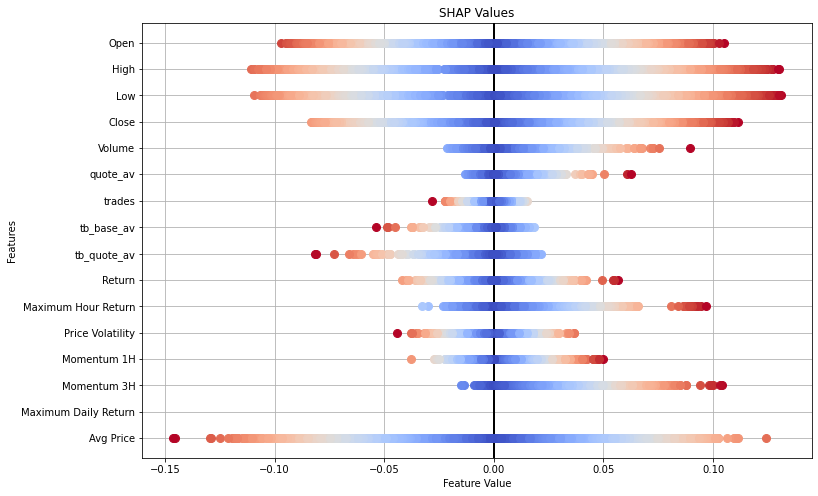

===Time lag 4 ===
Open: 1.2898912258322373
High: 1.521942528333263
Low: 1.5168224351000896
Close: 1.1814298269465315
Volume: 0.21286030442717324
quote_av: 0.06995697086509003
trades: 0.08132698785395873
tb_base_av: 0.07010931253844635
tb_quote_av: 0.13528502682631857
Return: 0.3153484942067598
Maximum Hour Return: 0.35482642514020873
Price Volatility: 0.21122288357164123
Momentum 1H: 0.213732337617318
Momentum 3H: 0.3182537638827207
Maximum Daily Return: 0.0
Avg Price: 1.0900700625292141


In [ ]:
y_lag = 3
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 7.0551e-04 - mse: 0.0014
Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 6.9883e-04 - mse: 0.0014
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 7.0501e-04 - mse: 0.0014
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8830e-04 - mse: 0.0014
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 7.1694e-04 - mse: 0.0014
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 7.0031e-04 - mse: 0.0014
Epoch 7/40
28/28 [==============================] - 0s 5ms/step - loss: 6.9352e-04 - mse: 0.0014
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 7.0052e-04 - mse: 0.0014
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 7.1217e-04 - mse: 0.0014
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 7.4270e-04 - mse: 0.0015
Epoch 11/40
28/28 [==========

Permutation explainer: 896it [04:05,  3.50it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 6.6489e-04 - mse: 0.0013


Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 6.5090e-04 - mse: 0.0013
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 6.7636e-04 - mse: 0.0014
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 6.6423e-04 - mse: 0.0013
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 6.7692e-04 - mse: 0.0014
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 6.9928e-04 - mse: 0.0014
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 7.1501e-04 - mse: 0.0014
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 6.5932e-04 - mse: 0.0013
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 6.6272e-04 - mse: 0.0013
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 7.0134e-04 - mse: 0.0014
Epoch 11/40
28/28 [==============================] - 0s 5ms/step - loss: 6.7102e-04 - mse: 0.0013
Epoch 12/40
28/28 [=========

Permutation explainer: 895it [04:14,  3.38it/s]                         

Epoch 1/40
21/28 [=====================>........] - ETA: 0s - loss: 6.6960e-04 - mse: 0.0013

28/28 [==============================] - 0s 5ms/step - loss: 6.6751e-04 - mse: 0.0013
Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 6.3569e-04 - mse: 0.0013
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4012e-04 - mse: 0.0013
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 6.5220e-04 - mse: 0.0013
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4201e-04 - mse: 0.0013
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 6.7826e-04 - mse: 0.0014
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 6.5740e-04 - mse: 0.0013
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 6.3496e-04 - mse: 0.0013
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 6.3653e-04 - mse: 0.0013
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 6.6235e-04 - mse: 0.0013
Epoch 11/40
28/28 [=====================

Permutation explainer: 894it [04:07,  3.46it/s]                         

Epoch 1/40
22/28 [======================>.......] - ETA: 0s - loss: 6.1487e-04 - mse: 0.0012   

28/28 [==============================] - 0s 5ms/step - loss: 6.2243e-04 - mse: 0.0012
Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 6.3583e-04 - mse: 0.0013
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 6.2607e-04 - mse: 0.0013
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 6.2271e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 6.4294e-04 - mse: 0.0013
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 6.2792e-04 - mse: 0.0013
Epoch 7/40
28/28 [==============================] - 0s 5ms/step - loss: 6.6630e-04 - mse: 0.0013
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 6.7569e-04 - mse: 0.0014
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4092e-04 - mse: 0.0013
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1959e-04 - mse: 0.0012
Epoch 11/40
28/28 [=====================

Permutation explainer: 893it [04:06,  3.48it/s]                         

Epoch 1/40
23/28 [=======================>......] - ETA: 0s - loss: 6.1428e-04 - mse: 0.0012

28/28 [==============================] - 0s 5ms/step - loss: 6.0261e-04 - mse: 0.0012
Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 6.3827e-04 - mse: 0.0013
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1764e-04 - mse: 0.0012
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 6.0606e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2474e-04 - mse: 0.0012
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 6.1501e-04 - mse: 0.0012
Epoch 7/40
28/28 [==============================] - 0s 6ms/step - loss: 6.2125e-04 - mse: 0.0012
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 6.1406e-04 - mse: 0.0012
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 6.4773e-04 - mse: 0.0013
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 6.0830e-04 - mse: 0.0012
Epoch 11/40
28/28 [=====================

Permutation explainer: 892it [04:04,  3.50it/s]                         
invalid value encountered in true_divide


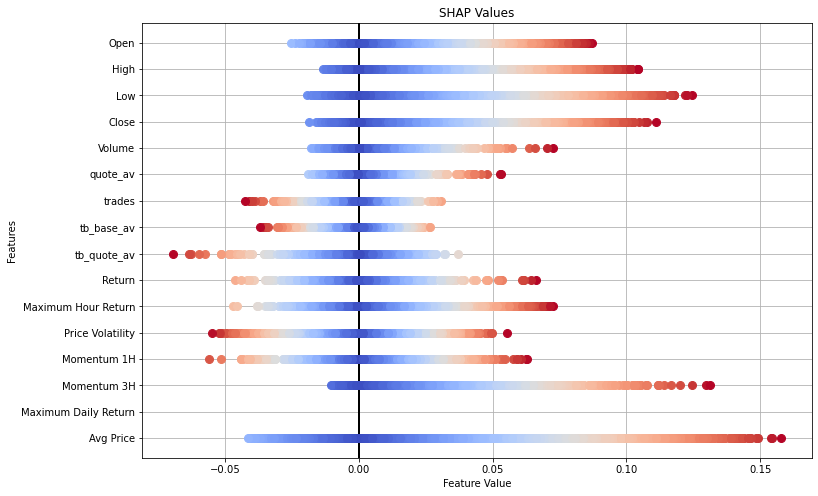

===Time lag 5 ===
Open: 1.0718842760313656
High: 1.1141413572750025
Low: 1.1588285060520562
Close: 1.0301444927963126
Volume: 0.18966022975320945
quote_av: 0.13274602657122064
trades: 0.23221261437784585
tb_base_av: 0.14764509638765846
tb_quote_av: 0.1500660652820243
Return: 0.24632611436298826
Maximum Hour Return: 0.31363733776788616
Price Volatility: 0.48018832655085486
Momentum 1H: 0.346587899938307
Momentum 3H: 0.4277913162483399
Maximum Daily Return: 0.0
Avg Price: 0.7162720421323697


In [ ]:
y_lag = 4
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8584e-04 - mse: 0.0014
Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8926e-04 - mse: 0.0014
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8849e-04 - mse: 0.0014
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 7.0746e-04 - mse: 0.0014
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8723e-04 - mse: 0.0014
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8199e-04 - mse: 0.0014
Epoch 7/40
28/28 [==============================] - 0s 5ms/step - loss: 6.9502e-04 - mse: 0.0014
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 6.7654e-04 - mse: 0.0014
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 6.7536e-04 - mse: 0.0014
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 6.8397e-04 - mse: 0.0014
Epoch 11/40
28/28 [==========

Permutation explainer: 895it [03:47,  3.76it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 6.8749e-04 - mse: 0.0014


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 6.9465e-04 - mse: 0.0014
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 6.5317e-04 - mse: 0.0013
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 6.5427e-04 - mse: 0.0013
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 6.2685e-04 - mse: 0.0013
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 6.5908e-04 - mse: 0.0013
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 6.3533e-04 - mse: 0.0013
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 6.3505e-04 - mse: 0.0013
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2283e-04 - mse: 0.0012
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2860e-04 - mse: 0.0013
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 6.3344e-04 - mse: 0.0013
Epoch 12/40
28/28 [=========

Permutation explainer: 894it [03:47,  3.76it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2928e-04 - mse: 0.0013
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 5.1300e-04 - mse: 0.0010

28/28 [==============================] - 0s 4ms/step - loss: 6.6008e-04 - mse: 0.0013
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 6.4474e-04 - mse: 0.0013
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9634e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 6.0075e-04 - mse: 0.0012
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1379e-04 - mse: 0.0012
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1776e-04 - mse: 0.0012
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9604e-04 - mse: 0.0012
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9509e-04 - mse: 0.0012
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 6.0727e-04 - mse: 0.0012
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2778e-04 - mse: 0.0013
Epoch 12/40
28/28 [====================

Permutation explainer: 893it [03:47,  3.76it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 5.7841e-04 - mse: 0.0012


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9558e-04 - mse: 0.0012
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9402e-04 - mse: 0.0012
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1648e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 6.1328e-04 - mse: 0.0012
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.7802e-04 - mse: 0.0012
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9085e-04 - mse: 0.0012
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9443e-04 - mse: 0.0012
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 6.3794e-04 - mse: 0.0013
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8763e-04 - mse: 0.0012
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9628e-04 - mse: 0.0012
Epoch 12/40
28/28 [=========

Permutation explainer: 892it [03:47,  3.76it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8408e-04 - mse: 0.0012
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 6.0233e-04 - mse: 0.0012

28/28 [==============================] - 0s 4ms/step - loss: 5.6770e-04 - mse: 0.0011
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5637e-04 - mse: 0.0011
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8155e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8957e-04 - mse: 0.0012
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8304e-04 - mse: 0.0012
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 6.0184e-04 - mse: 0.0012
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.7057e-04 - mse: 0.0011
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6159e-04 - mse: 0.0011
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 5.9322e-04 - mse: 0.0012
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8652e-04 - mse: 0.0012
Epoch 12/40
28/28 [====================

Permutation explainer: 892it [03:47,  3.74it/s]                         
invalid value encountered in true_divide


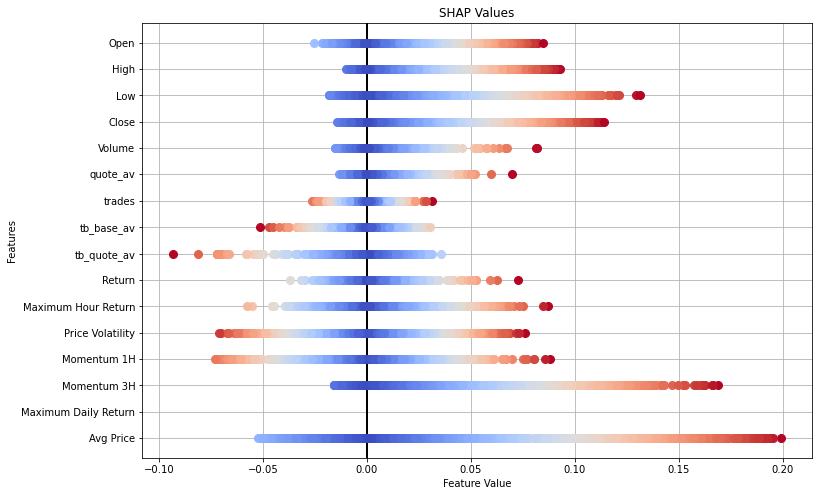

===Time lag 6 ===
Open: 1.0090328834732016
High: 1.048261640020228
Low: 1.1015341133975725
Close: 1.0965631198168322
Volume: 0.22636125789866363
quote_av: 0.14364691395515672
trades: 0.17397388527881302
tb_base_av: 0.13931524703616927
tb_quote_av: 0.15988173592012345
Return: 0.14253529381042257
Maximum Hour Return: 0.3807783413494178
Price Volatility: 0.5147138123413615
Momentum 1H: 0.36972560850195657
Momentum 3H: 0.531873811078089
Maximum Daily Return: 0.0
Avg Price: 0.9210374895321423


In [ ]:
y_lag = 5
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 6.5485e-04 - mse: 0.0013
Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 6.4737e-04 - mse: 0.0013
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 6.3470e-04 - mse: 0.0013
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 6.2436e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 6.4446e-04 - mse: 0.0013
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 6.4043e-04 - mse: 0.0013
Epoch 7/40
28/28 [==============================] - 0s 5ms/step - loss: 6.1393e-04 - mse: 0.0012
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 6.2479e-04 - mse: 0.0012
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 6.3969e-04 - mse: 0.0013
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 6.5632e-04 - mse: 0.0013
Epoch 11/40
28/28 [==========

Permutation explainer: 894it [03:48,  3.74it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9214e-04 - mse: 0.0012
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 7.7002e-04 - mse: 0.0015

28/28 [==============================] - 0s 4ms/step - loss: 6.1297e-04 - mse: 0.0012
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2033e-04 - mse: 0.0012
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9678e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 5.8845e-04 - mse: 0.0012
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8468e-04 - mse: 0.0012
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.9707e-04 - mse: 0.0012
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 6.2578e-04 - mse: 0.0013
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8610e-04 - mse: 0.0012
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8077e-04 - mse: 0.0012
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 6.0003e-04 - mse: 0.0012
Epoch 12/40
28/28 [====================

Permutation explainer: 893it [03:49,  3.72it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4809e-04 - mse: 0.0011
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 6.3367e-04 - mse: 0.0013

28/28 [==============================] - 0s 4ms/step - loss: 5.9048e-04 - mse: 0.0012
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6884e-04 - mse: 0.0011
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5168e-04 - mse: 0.0011
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5510e-04 - mse: 0.0011
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6287e-04 - mse: 0.0011
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6974e-04 - mse: 0.0011
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.7031e-04 - mse: 0.0011
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4453e-04 - mse: 0.0011
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 5.7128e-04 - mse: 0.0011
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.8676e-04 - mse: 0.0012
Epoch 12/40
28/28 [====================

Permutation explainer: 892it [03:47,  3.75it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2518e-04 - mse: 0.0011


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3647e-04 - mse: 0.0011
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3118e-04 - mse: 0.0011
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3639e-04 - mse: 0.0011
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4865e-04 - mse: 0.0011
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5293e-04 - mse: 0.0011
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3611e-04 - mse: 0.0011
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 5.3413e-04 - mse: 0.0011
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4224e-04 - mse: 0.0011
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2265e-04 - mse: 0.0010
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4420e-04 - mse: 0.0011
Epoch 12/40
28/28 [=========

Permutation explainer: 892it [03:47,  3.75it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2053e-04 - mse: 0.0010
Epoch 2/40


28/28 [==============================] - 0s 4ms/step - loss: 5.2151e-04 - mse: 0.0010
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1327e-04 - mse: 0.0010
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.9236e-04 - mse: 9.8472e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 4.9784e-04 - mse: 9.9567e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0347e-04 - mse: 0.0010
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2507e-04 - mse: 0.0011
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3258e-04 - mse: 0.0011
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0792e-04 - mse: 0.0010
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0694e-04 - mse: 0.0010
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1306e-04 - mse: 0.0010
Epoch 12/40
28/28 [============

Permutation explainer: 891it [03:47,  3.75it/s]                         
invalid value encountered in true_divide


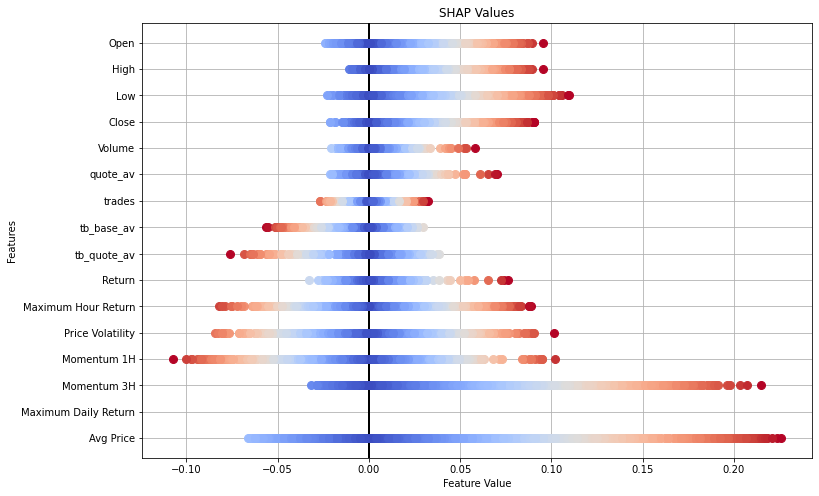

===Time lag 7 ===
Open: 0.97872524777328
High: 0.8407623609216515
Low: 0.8807996479253792
Close: 0.9397516004277249
Volume: 0.16448537904062538
quote_av: 0.11591685119450276
trades: 0.12856002846983097
tb_base_av: 0.1976164027869256
tb_quote_av: 0.16255083513029556
Return: 0.094648882304115
Maximum Hour Return: 0.5225624233949209
Price Volatility: 0.503986828612716
Momentum 1H: 0.41726451334045855
Momentum 3H: 0.7206066608774381
Maximum Daily Return: 0.0
Avg Price: 1.0555274449690626


In [ ]:
y_lag = 6
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 6.4269e-04 - mse: 0.0013
Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 5.9260e-04 - mse: 0.0012
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 6.1506e-04 - mse: 0.0012
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 5.8315e-04 - mse: 0.0012
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 5.7878e-04 - mse: 0.0012
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 6.2086e-04 - mse: 0.0012
Epoch 7/40
28/28 [==============================] - 0s 5ms/step - loss: 6.0512e-04 - mse: 0.0012
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 6.0234e-04 - mse: 0.0012
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 6.0909e-04 - mse: 0.0012
Epoch 10/40
28/28 [==============================] - 0s 5ms/step - loss: 5.6023e-04 - mse: 0.0011
Epoch 11/40
28/28 [==========

Permutation explainer: 893it [03:46,  3.77it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4982e-04 - mse: 0.0011
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 3.8839e-04 - mse: 7.7678e-04

28/28 [==============================] - 0s 5ms/step - loss: 5.6109e-04 - mse: 0.0011
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3988e-04 - mse: 0.0011
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4169e-04 - mse: 0.0011
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3955e-04 - mse: 0.0011
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3197e-04 - mse: 0.0011
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3423e-04 - mse: 0.0011
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.7710e-04 - mse: 0.0012
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2913e-04 - mse: 0.0011
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5804e-04 - mse: 0.0011
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.6812e-04 - mse: 0.0011
Epoch 12/40
28/28 [====================

Permutation explainer: 892it [03:44,  3.79it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3824e-04 - mse: 0.0011


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1218e-04 - mse: 0.0010
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2926e-04 - mse: 0.0011
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2245e-04 - mse: 0.0010
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 4.8776e-04 - mse: 9.7553e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0807e-04 - mse: 0.0010
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1032e-04 - mse: 0.0010
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0622e-04 - mse: 0.0010
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0806e-04 - mse: 0.0010
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3218e-04 - mse: 0.0011
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 5.3117e-04 - mse: 0.0011
Epoch 12/40
28/28 [=====

Permutation explainer: 892it [03:45,  3.79it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2152e-04 - mse: 0.0010
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 4.0741e-04 - mse: 8.1481e-04

28/28 [==============================] - 0s 4ms/step - loss: 5.1272e-04 - mse: 0.0010
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7676e-04 - mse: 9.5352e-04
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.9068e-04 - mse: 9.8135e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1777e-04 - mse: 0.0010
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 5.0108e-04 - mse: 0.0010
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0473e-04 - mse: 0.0010
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.2557e-04 - mse: 0.0011
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1448e-04 - mse: 0.0010
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0372e-04 - mse: 0.0010
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 4.8856e-04 - mse: 9.7712e-04
Epoch 12/40
28/28 [========

Permutation explainer: 891it [03:45,  3.78it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0479e-04 - mse: 0.0010


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 4.8875e-04 - mse: 9.7750e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0919e-04 - mse: 0.0010
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.6690e-04 - mse: 9.3380e-04
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 4.6960e-04 - mse: 9.3921e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 4.9882e-04 - mse: 9.9765e-04
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 4.8424e-04 - mse: 9.6848e-04
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7057e-04 - mse: 9.4114e-04
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 4.8313e-04 - mse: 9.6625e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.5895e-04 - mse: 0.0011
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7075e-04 - mse: 9.4151e

Permutation explainer: 890it [03:44,  3.79it/s]                         
invalid value encountered in true_divide


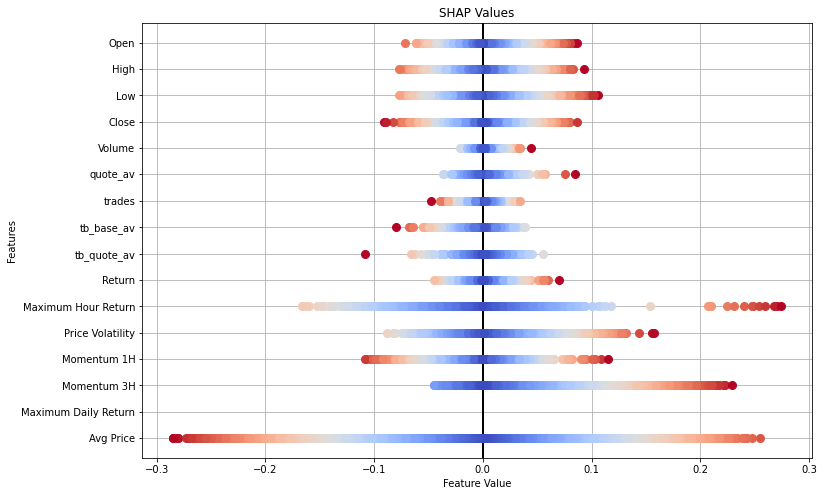

===Time lag 8 ===
Open: 0.858127163933457
High: 0.6532171614646948
Low: 0.7640963297728838
Close: 0.89443628926045
Volume: 0.10502401419845367
quote_av: 0.12656491689655153
trades: 0.21707522474454355
tb_base_av: 0.15354377278661072
tb_quote_av: 0.1880335929968567
Return: 0.13118801911268935
Maximum Hour Return: 0.6432055032714777
Price Volatility: 0.5466347150756714
Momentum 1H: 0.4334548395082048
Momentum 3H: 0.8092001587194243
Maximum Daily Return: 0.0
Avg Price: 1.266901029689937


In [ ]:
y_lag = 7
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 5.4897e-04 - mse: 0.0011
Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 5.4081e-04 - mse: 0.0011
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 5.4712e-04 - mse: 0.0011
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1410e-04 - mse: 0.0010
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 5.3465e-04 - mse: 0.0011
Epoch 6/40
28/28 [==============================] - 0s 5ms/step - loss: 5.1126e-04 - mse: 0.0010
Epoch 7/40
28/28 [==============================] - 0s 5ms/step - loss: 5.0761e-04 - mse: 0.0010
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1982e-04 - mse: 0.0010
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 5.4672e-04 - mse: 0.0011
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.4735e-04 - mse: 0.0011
Epoch 11/40
28/28 [==========

Permutation explainer: 892it [03:44,  3.79it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7167e-04 - mse: 9.4333e-04
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 4.4908e-04 - mse: 8.9816e-04

28/28 [==============================] - 0s 4ms/step - loss: 4.9570e-04 - mse: 9.9141e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0704e-04 - mse: 0.0010
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.9511e-04 - mse: 9.9023e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 4.8397e-04 - mse: 9.6794e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7282e-04 - mse: 9.4563e-04
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 4.6431e-04 - mse: 9.2862e-04
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7116e-04 - mse: 9.4232e-04
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7521e-04 - mse: 9.5042e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 4.9798e-04 - mse: 9.9595e-04
Epoch 11/40
28/28 [==============================] - 0s 5ms/step - loss: 4.8305e-04 - mse: 9.6610e-04
Epo

Permutation explainer: 892it [03:45,  3.78it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7256e-04 - mse: 9.4512e-04


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 4.5678e-04 - mse: 9.1357e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7592e-04 - mse: 9.5185e-04
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.3329e-04 - mse: 8.6658e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4475e-04 - mse: 8.8950e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 4.8275e-04 - mse: 9.6550e-04
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 4.6915e-04 - mse: 9.3830e-04
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 4.3429e-04 - mse: 8.6858e-04
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 4.8751e-04 - mse: 9.7502e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7578e-04 - mse: 9.5155e-04
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 4.6358e-04 - mse:

Permutation explainer: 891it [03:44,  3.79it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 4.9283e-04 - mse: 9.8565e-04
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 3.2258e-04 - mse: 6.4515e-04

28/28 [==============================] - 0s 5ms/step - loss: 4.6873e-04 - mse: 9.3745e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7061e-04 - mse: 9.4122e-04
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4531e-04 - mse: 8.9063e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 4.2560e-04 - mse: 8.5121e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 4.3643e-04 - mse: 8.7287e-04
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 4.5702e-04 - mse: 9.1405e-04
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 4.5413e-04 - mse: 9.0826e-04
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 4.3707e-04 - mse: 8.7414e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7003e-04 - mse: 9.4006e-04
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 4.6098e-04 - mse: 9.2196e-04

Permutation explainer: 890it [03:44,  3.79it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4013e-04 - mse: 8.8025e-04
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 4.7086e-04 - mse: 9.4173e-04

28/28 [==============================] - 0s 4ms/step - loss: 4.3283e-04 - mse: 8.6566e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 4.3107e-04 - mse: 8.6214e-04
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.3022e-04 - mse: 8.6044e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 4.2310e-04 - mse: 8.4620e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 4.1698e-04 - mse: 8.3395e-04
Epoch 7/40
28/28 [==============================] - 0s 5ms/step - loss: 4.1014e-04 - mse: 8.2027e-04
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 4.2002e-04 - mse: 8.4003e-04
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 4.0835e-04 - mse: 8.1669e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 4.1168e-04 - mse: 8.2337e-04
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 4.1298e-04 - mse: 8.2597e-04

Permutation explainer: 889it [03:44,  3.78it/s]                         
invalid value encountered in true_divide


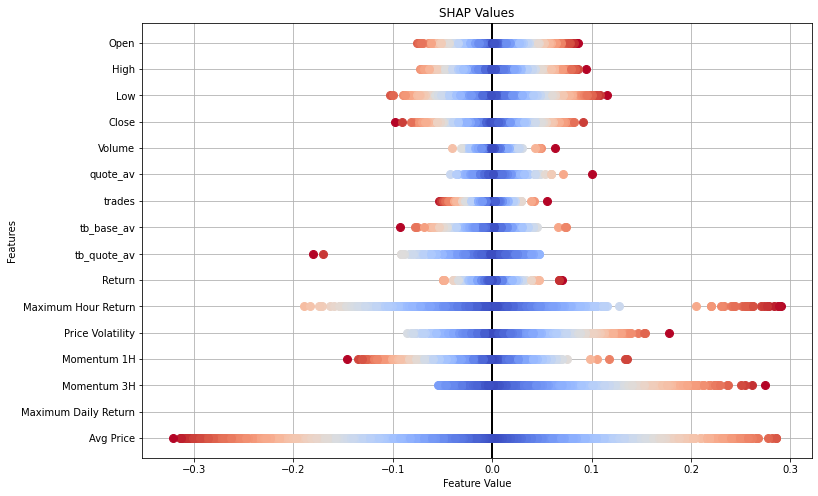

===Time lag 9 ===
Open: 0.8134581019067435
High: 0.6364259876099507
Low: 0.7902022271614596
Close: 0.8231088952222667
Volume: 0.1631624107139389
quote_av: 0.1050002535649528
trades: 0.26962823771856165
tb_base_av: 0.19015645722623337
tb_quote_av: 0.2047894486417939
Return: 0.14315824595812776
Maximum Hour Return: 0.7800777994273873
Price Volatility: 0.6580328735285097
Momentum 1H: 0.514444140140067
Momentum 3H: 0.8708981163836956
Maximum Daily Return: 0.0
Avg Price: 1.5474753668352066


In [ ]:
y_lag = 8
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 5.4490e-04 - mse: 0.0011
Epoch 2/40
28/28 [==============================] - 0s 5ms/step - loss: 4.9754e-04 - mse: 9.9507e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0739e-04 - mse: 0.0010
Epoch 4/40
28/28 [==============================] - 0s 5ms/step - loss: 4.8961e-04 - mse: 9.7922e-04
Epoch 5/40
28/28 [==============================] - 0s 5ms/step - loss: 5.0431e-04 - mse: 0.0010
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 5.0576e-04 - mse: 0.0010
Epoch 7/40
28/28 [==============================] - 0s 5ms/step - loss: 4.9917e-04 - mse: 9.9834e-04
Epoch 8/40
28/28 [==============================] - 0s 5ms/step - loss: 5.0175e-04 - mse: 0.0010
Epoch 9/40
28/28 [==============================] - 0s 5ms/step - loss: 4.8462e-04 - mse: 9.6925e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 5.1359e-04 - mse: 0.0010
Epoch 11/40
2

Permutation explainer: 892it [03:45,  3.79it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4743e-04 - mse: 8.9487e-04
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 2.4291e-04 - mse: 4.8582e-04

28/28 [==============================] - 0s 4ms/step - loss: 4.8442e-04 - mse: 9.6884e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 4.3884e-04 - mse: 8.7768e-04
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4535e-04 - mse: 8.9069e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4466e-04 - mse: 8.8931e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 4.6667e-04 - mse: 9.3333e-04
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 4.7614e-04 - mse: 9.5228e-04
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 4.5538e-04 - mse: 9.1077e-04
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 4.8215e-04 - mse: 9.6429e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 4.6959e-04 - mse: 9.3918e-04
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 4.5447e-04 - mse: 9.0894e-04

Permutation explainer: 891it [03:44,  3.79it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4284e-04 - mse: 8.8567e-04


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 4.2420e-04 - mse: 8.4839e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4237e-04 - mse: 8.8475e-04
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.5524e-04 - mse: 9.1048e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 3.9444e-04 - mse: 7.8887e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 4.5529e-04 - mse: 9.1058e-04
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4569e-04 - mse: 8.9137e-04
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 4.5761e-04 - mse: 9.1521e-04
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 4.3246e-04 - mse: 8.6492e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 4.3125e-04 - mse: 8.6249e-04
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 4.2280e-04 - mse:

Permutation explainer: 890it [03:44,  3.79it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 4ms/step - loss: 4.6504e-04 - mse: 9.3008e-04
Epoch 2/40
 1/28 [>.............................] - ETA: 0s - loss: 3.4031e-04 - mse: 6.8062e-04

28/28 [==============================] - 0s 4ms/step - loss: 4.3452e-04 - mse: 8.6903e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 4.0842e-04 - mse: 8.1685e-04
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 4.1470e-04 - mse: 8.2939e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 4.2008e-04 - mse: 8.4016e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 4.3288e-04 - mse: 8.6577e-04
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 4.0458e-04 - mse: 8.0916e-04
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 4.1747e-04 - mse: 8.3494e-04
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 4.4127e-04 - mse: 8.8254e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 4.1139e-04 - mse: 8.2279e-04
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 4.2706e-04 - mse: 8.5412e-04

Permutation explainer: 889it [03:44,  3.78it/s]                         

Epoch 1/40
28/28 [==============================] - 0s 5ms/step - loss: 3.9108e-04 - mse: 7.8216e-04


Epoch 2/40
28/28 [==============================] - 0s 4ms/step - loss: 3.8827e-04 - mse: 7.7654e-04
Epoch 3/40
28/28 [==============================] - 0s 4ms/step - loss: 4.0667e-04 - mse: 8.1334e-04
Epoch 4/40
28/28 [==============================] - 0s 4ms/step - loss: 3.8099e-04 - mse: 7.6199e-04
Epoch 5/40
28/28 [==============================] - 0s 4ms/step - loss: 3.8841e-04 - mse: 7.7682e-04
Epoch 6/40
28/28 [==============================] - 0s 4ms/step - loss: 3.9808e-04 - mse: 7.9616e-04
Epoch 7/40
28/28 [==============================] - 0s 4ms/step - loss: 3.7070e-04 - mse: 7.4141e-04
Epoch 8/40
28/28 [==============================] - 0s 4ms/step - loss: 3.7216e-04 - mse: 7.4432e-04
Epoch 9/40
28/28 [==============================] - 0s 4ms/step - loss: 4.1789e-04 - mse: 8.3578e-04
Epoch 10/40
28/28 [==============================] - 0s 4ms/step - loss: 4.2839e-04 - mse: 8.5678e-04
Epoch 11/40
28/28 [==============================] - 0s 4ms/step - loss: 3.9059e-04 - mse:

Permutation explainer: 888it [03:43,  3.79it/s]                         
invalid value encountered in true_divide


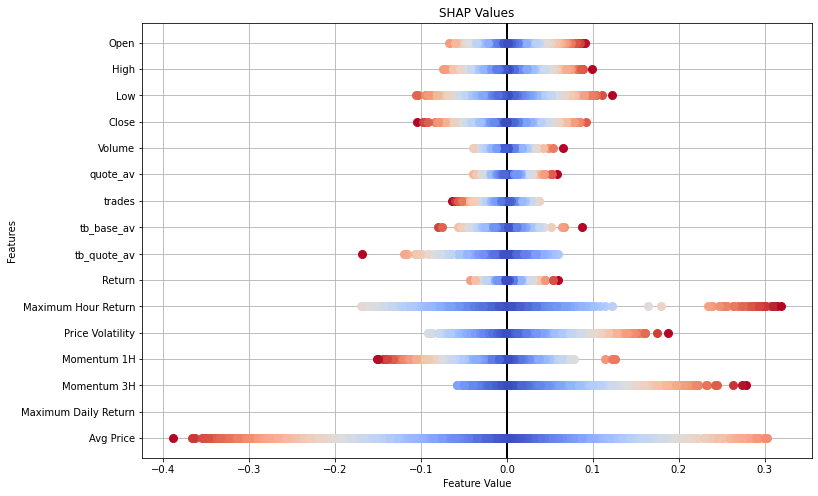

===Time lag 10 ===
Open: 0.7921057900911526
High: 0.6221608699627044
Low: 0.8553386694466957
Close: 0.788842537673555
Volume: 0.17113324624077797
quote_av: 0.11967316729241491
trades: 0.2946143228490589
tb_base_av: 0.19124374753769535
tb_quote_av: 0.2537567786780222
Return: 0.147902398393098
Maximum Hour Return: 0.9400607375929002
Price Volatility: 0.7667738605933677
Momentum 1H: 0.5907545027399743
Momentum 3H: 0.8688206035287378
Maximum Daily Return: 0.0
Avg Price: 1.982308777268036


In [ ]:
y_lag = 9
feature_importance = np.zeros(scaled.shape[1])

for x_lag in range(WINDOW_SIZE):
  temp = feature_select(x_lag, y_lag)
  if x_lag == 0:
    scatter_values = temp
  else:
    scatter_values = np.vstack((scatter_values, temp))
  feature_importance += [x + y for x, y in zip(np.abs(temp).mean(0), feature_importance)]
feature_importance_by_y_lag.append(feature_importance)

# Choose a colormap
cmap = cm.coolwarm

plt.figure(figsize=(12, 8))
plt.axvline(x=0, color='k', lw=2)

for i, col in enumerate(scatter_values.T):
    # Calculate absolute values and normalize within each column for color mapping
    abs_col = np.abs(col)
    normalized_abs_col = (abs_col - abs_col.min()) / (abs_col.max() - abs_col.min())

    # Get colors from the colormap based on normalized absolute values
    colors = cmap(normalized_abs_col)

    # Plot each point with the corresponding color
    for x, c in zip(col, colors):
        plt.plot(x, i, 'o', markersize=8, color=c)

plt.yticks(np.arange(len(btc_columns)), btc_columns)
plt.xlabel("Feature Value")
plt.ylabel("Features")
plt.title("SHAP Values")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("===Time lag",(y_lag+1),"===")
for column, value in zip(btc_columns, feature_importance_by_y_lag[y_lag]):
  print(f"{column}: {value}")

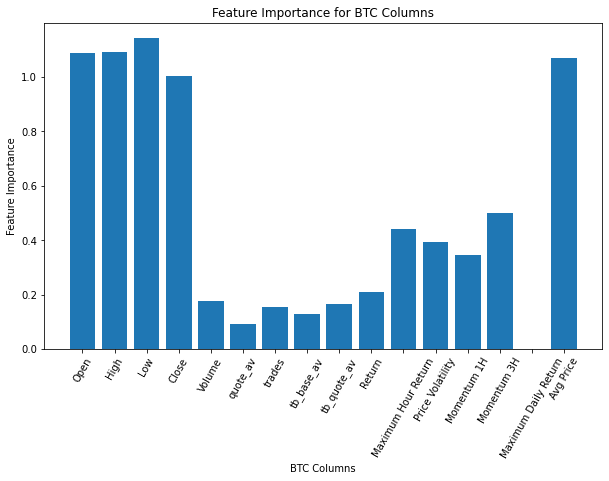

===Whole added===
Open: 0.7921057900911526
High: 0.6221608699627044
Low: 0.8553386694466957
Close: 0.788842537673555
Volume: 0.17113324624077797
quote_av: 0.11967316729241491
trades: 0.2946143228490589
tb_base_av: 0.19124374753769535
tb_quote_av: 0.2537567786780222
Return: 0.147902398393098
Maximum Hour Return: 0.9400607375929002
Price Volatility: 0.7667738605933677
Momentum 1H: 0.5907545027399743
Momentum 3H: 0.8688206035287378
Maximum Daily Return: 0.0
Avg Price: 1.982308777268036
Top 10 features are  ['Avg Price' 'Maximum Hour Return' 'Momentum 3H' 'Low' 'Open' 'Close'
 'Price Volatility' 'High' 'Momentum 1H' 'trades']


In [ ]:
feature_importance_by_y_lag_np = np.array(feature_importance_by_y_lag)
feature_importance_avg = feature_importance_by_y_lag_np.mean(0)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(btc_columns, feature_importance_avg)
plt.xlabel('BTC Columns')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for BTC Columns')
plt.xticks(rotation=60)
plt.show()

print("===Whole added===")
for column, value in zip(btc_columns, feature_importance):
  print(f"{column}: {value}")

print("Top 10 features are ", btc_columns[np.argsort(-feature_importance)[:10]])